           DATA CORRELATION PROJECT

This project is purely for learning.Its a DATA CORRELATION PROJECT that is a guide on how to use python to determine hoe different colums are correlated.This project is purely correlatiion as we will be finding the relationship between columns with different types of datasets.( not just any other correlation since we will be doing data correlation for dtpe(objects)

In [14]:
#for every project the first step we import libraries  
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib .pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
# if we want to limit the output to be displayed we will input the below code
#display(numbers[:10])
from IPython.display import display

# The below command sets the output of Matplotlib plotsto be displayed inline within the Jupyter Notebook. 
#This means that any plots created with Matplotlib will be displayed directly below the code cell that created them.

%matplotlib inline
# The below line of code adjusts the configurations of all the plots we will create
matplotlib.rcParams['figure.figsize'] =(12,8)

In [4]:
# next we load the data and assign the dataset variable ad df
df =pd.read_csv('moviees dataset.csv')


In [5]:
df.shape

(7668, 15)

In [6]:
# we will searching for null values in our dataset

df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [7]:
# we have so many 'int 64 'missing columns we cannot drop all those columns we will have tofill some of the columns with
#the median, others  will argue and fill the missing values with the mean



#we will fill the missing values in the score column
score_median = df['score'].median()
df['score'].fillna(score_median, inplace=True)

#we will fill the missing values in the votes column
votes_median = df['votes'].median()
df['votes'].fillna(votes_median, inplace=True)

# we will fill the missing values in the budget column
budget_median = df['budget'].median()
df['budget'].fillna(budget_median, inplace=True)
#we will fill the missing values in the gross column
gross_median = df['gross'].median()
df['gross'].fillna(gross_median, inplace=True)
#we will fill the missing values in the runtime column
runtime_median = df['runtime'].median()
df['runtime'].fillna(runtime_median, inplace=True)

In [8]:
# After filling the int null values we will be looking whether the table has been updated

df.isnull().sum()

name         0
rating      77
genre        0
year         0
released     2
score        0
votes        0
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      0
dtype: int64

In [9]:
# we will be dropping the rows with null values 

df.dropna(inplace=True)

In [10]:
#we will be looking at the new shape of or data to look at our new shape whether the null values have been dropped
df.shape

(7576, 15)

In [11]:

# Check for duplicates in the entire DataFrame
duplicates = df.duplicated()

# Print the number of duplicate rows
print("Number of duplicate rows:", duplicates.sum())

# Print the duplicate rows
print(df[duplicates])

Number of duplicate rows: 0
Empty DataFrame
Columns: [name, rating, genre, year, released, score, votes, director, writer, star, country, budget, gross, company, runtime]
Index: []


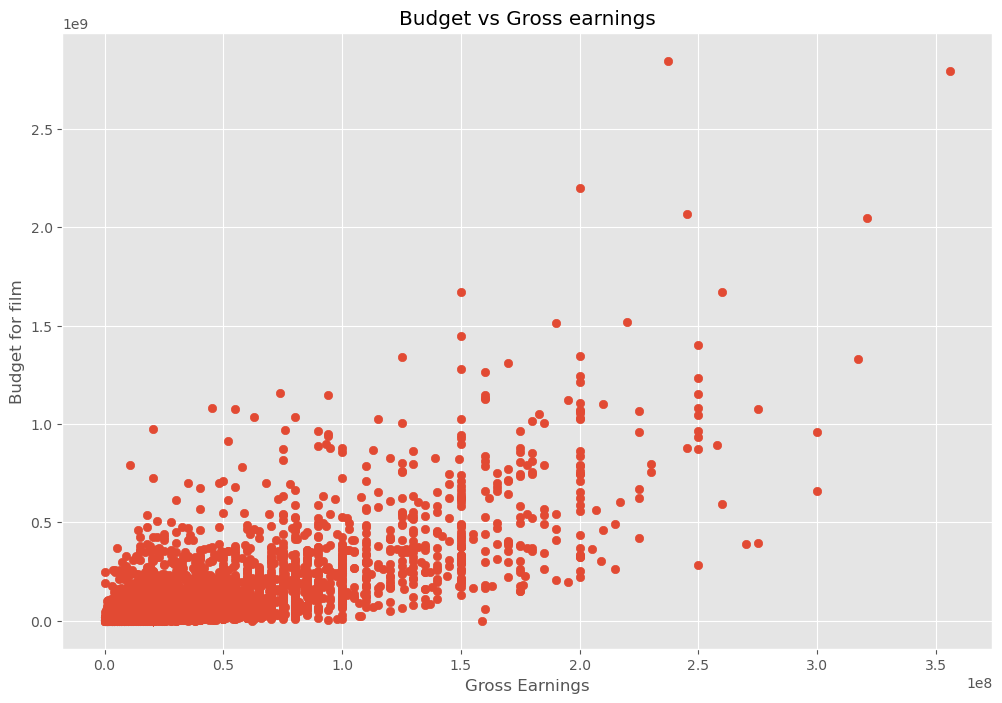

In [36]:
# look for the correlation between budget and gross
# Scatter plot with budget vs gross
plt.scatter(x=df['budget'],y=df['gross'])

plt.title('Budget vs Gross earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for film')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

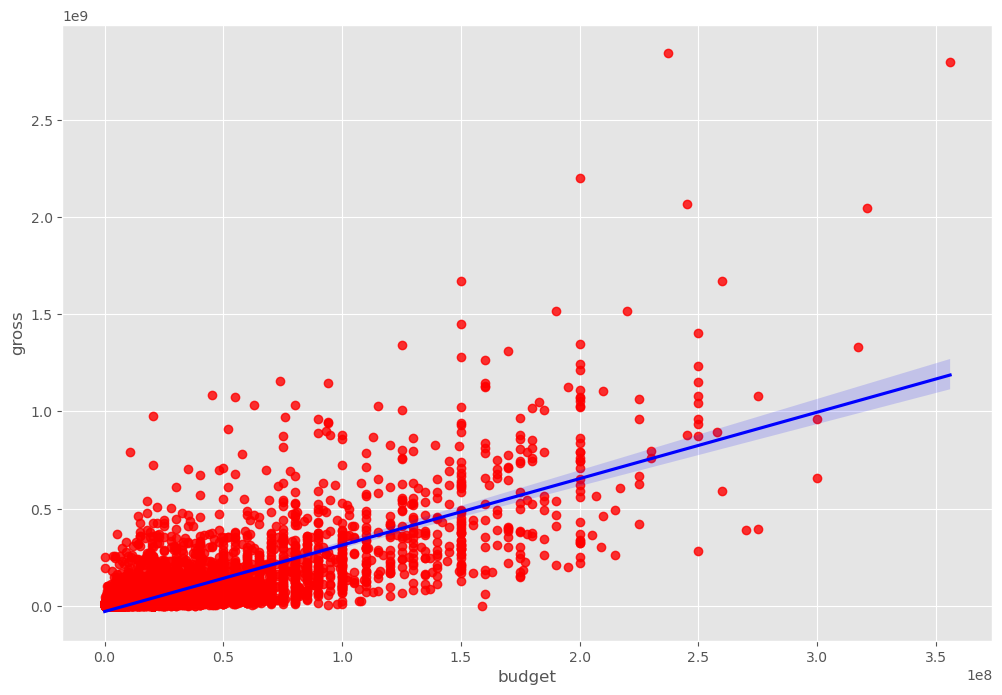

In [12]:
#plot using tableau
# the below plot we will be looking the extent of the relationship between the gross and the budget
sns.regplot(x='budget',y='gross',data=df,scatter_kws={'color':'red'},line_kws={'color':'blue'})

In [39]:
#below we will be looking at the relationship between the int values in the whole table
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.102180,0.226709,0.295868,0.261960,0.120786
score,0.102180,1.000000,0.411929,0.062478,0.187536,0.400562
votes,0.226709,0.411929,1.000000,0.460066,0.632341,0.309324
budget,0.295868,0.062478,0.460066,1.000000,0.746358,0.273790
gross,0.261960,0.187536,0.632341,0.746358,1.000000,0.244161
runtime,0.120786,0.400562,0.309324,0.273790,0.244161,1.000000


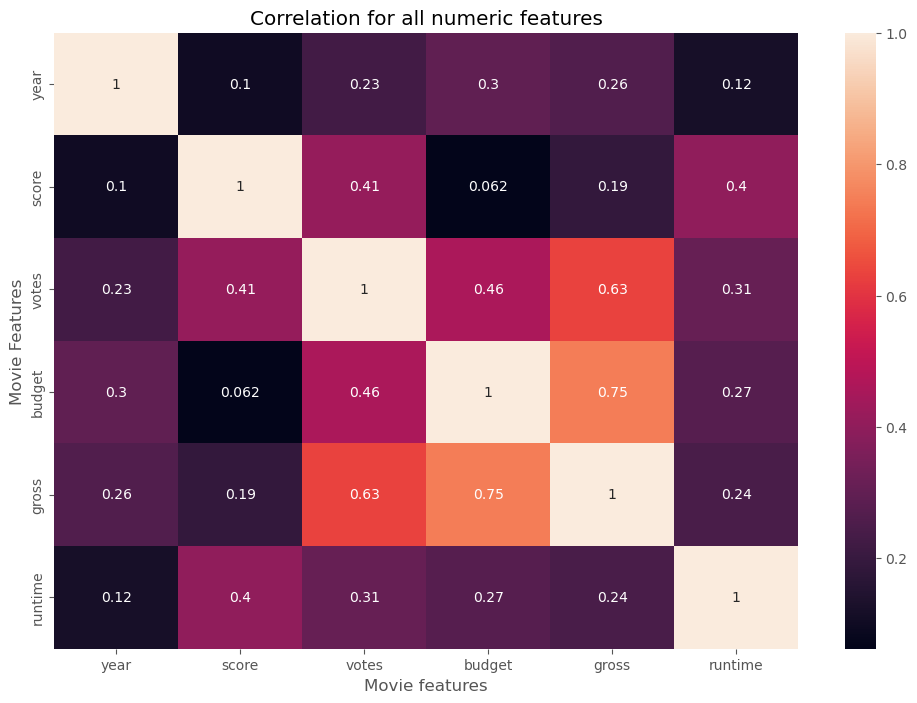

In [42]:
# Below we will be plotting the above figures on a heatmap

correlation =df.corr()
sns.heatmap(correlation,annot=True)
plt.title('Correlation for all numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie Features')
plt.show()

In [44]:
#In the below code we will be asigning random values to columns with dtype()object we will assign int type of
#data to calculate the correlation between all columns


df_numerized=df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype =='object'):
        df_numerized[col_name] =df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6508,6,6,1980,1685,8.4,927000.0,2545,3960,1022,54,19000000.0,46998772.0,2274,146.0
1,5500,6,1,1980,1472,5.8,65000.0,2234,1613,316,55,4500000.0,58853106.0,710,104.0
2,5075,4,0,1980,1751,8.7,1200000.0,1093,2535,1708,55,18000000.0,538375067.0,1506,124.0
3,282,4,4,1980,1472,7.7,221000.0,1279,1976,2198,55,3500000.0,83453539.0,1770,88.0
4,1016,6,4,1980,1523,7.3,108000.0,1037,511,398,55,6000000.0,39846344.0,1737,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,6401,6,5,2020,91,5.4,2400.0,2476,3828,2386,55,20500000.0,3661.0,1861,98.0
7656,6938,5,4,2020,1865,5.0,294.0,2471,3821,2327,55,20500000.0,413378.0,1863,120.0
7658,789,6,6,2020,1091,6.6,35.0,1740,1052,515,55,5000.0,20205757.0,1710,78.0
7659,2626,3,9,2020,2120,3.4,447.0,1586,2435,1500,55,20500000.0,13266.0,1949,87.0


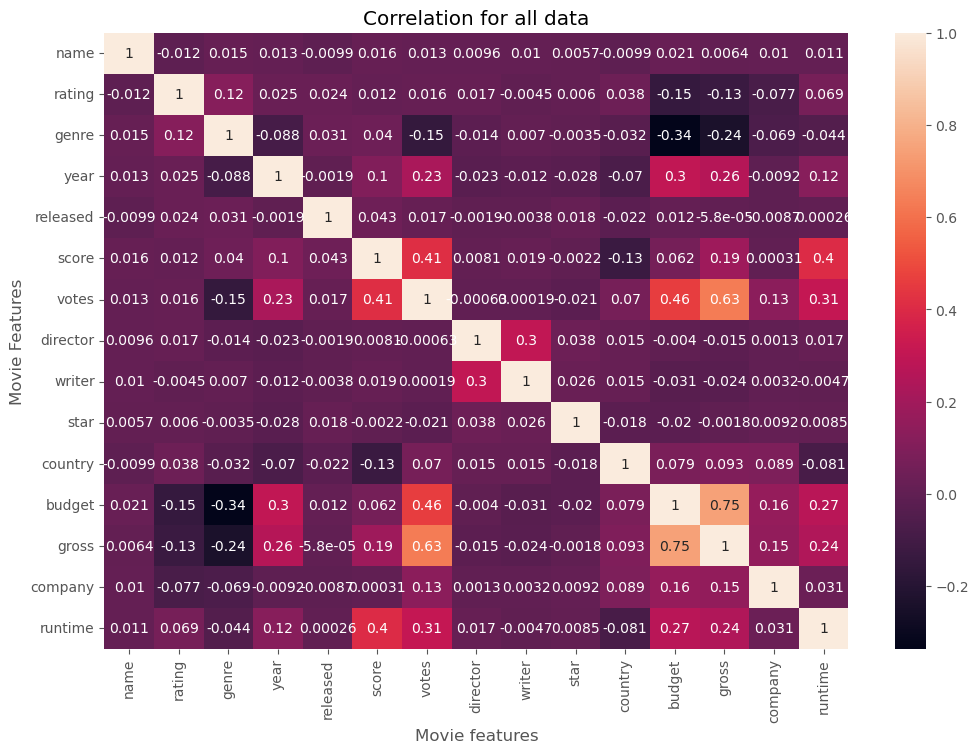

In [48]:
#The below heatmap is an illustration of the above table to plot the values above

correlation =df_numerized.corr()
sns.heatmap(correlation,annot =True)
plt.title('Correlation for all data')
plt.xlabel('Movie features')
plt.ylabel('Movie Features')
plt.show()


In [50]:
#In the below code we will be unstacking the values in the heatmap above

correlation_df =df_numerized.corr()
corr_pairs =correlation_df.unstack()
corr_pairs

name     name        1.000000
         rating     -0.011944
         genre       0.015250
         year        0.013483
         released   -0.009936
                       ...   
runtime  country    -0.081427
         budget      0.273790
         gross       0.244161
         company     0.030854
         runtime     1.000000
Length: 225, dtype: float64

In [58]:
# we will be looking for the correlations above 0.5
high_corr =corr_pairs[(corr_pairs)>0.5]
high_corr

name      name        1.000000
rating    rating      1.000000
genre     genre       1.000000
year      year        1.000000
released  released    1.000000
score     score       1.000000
votes     votes       1.000000
          gross       0.632341
director  director    1.000000
writer    writer      1.000000
star      star        1.000000
country   country     1.000000
budget    budget      1.000000
          gross       0.746358
gross     votes       0.632341
          budget      0.746358
          gross       1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [60]:
#we will be looking for values with the less relationship ie below 0.1
minimal_corr =corr_pairs[(corr_pairs)<0.1]
minimal_corr

name     rating     -0.011944
         genre       0.015250
         year        0.013483
         released   -0.009936
         score       0.016157
                       ...   
runtime  director    0.017403
         writer     -0.004686
         star        0.008549
         country    -0.081427
         company     0.030854
Length: 172, dtype: float64